Abir Islam, Dr. Joshua Young, ENGR 301, Lab 7

# Part 0:

Problem 1:

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df1 = pd.read_csv("glass_labelled.csv")

In [3]:
df2 = pd.read_csv("glass_unlabelled.csv")

In [4]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


Problem 2a:

In [6]:
df1_new = df2.drop(["RI"],axis = 1)

In [8]:
from sklearn.cluster import KMeans
km = KMeans()
wcss = []
for k in range(1,12):
    km = KMeans(n_clusters = k)
    km.fit(df1_new) 
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Problem 2b:

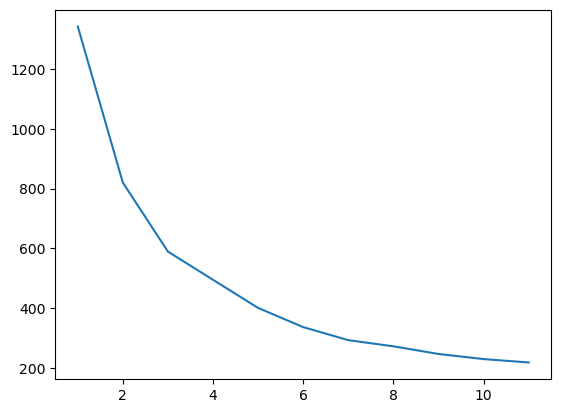

In [9]:
plt.plot(range(1, 12), wcss)

In [10]:
km = KMeans(n_clusters = 3)
km.fit(df1_new)

KMeans(n_clusters=3)

The ideal number of clusteres is 3

Problem 2c:

In [14]:
df1["predicted_labels"] = km.labels_

In [15]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred_labels,predicted_labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0


Problem 3a:

There presents to be 7 different glasses, but since there's no input data for the 4th entry theres only 6.

Problem 3b:

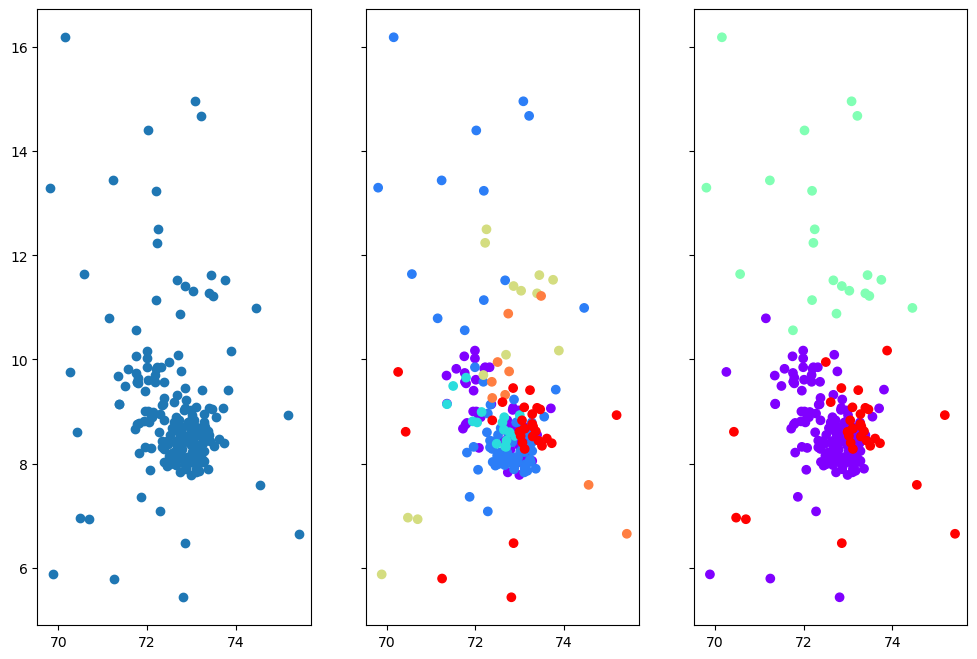

In [16]:
fig,(ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (12, 8))

ax1.scatter(x = df1["Si"], y = df1["Ca"])
ax2.scatter(x = df1["Si"], y = df1["Ca"], c = df1["Type"], cmap ="rainbow")
ax3.scatter(x = df1["Si"], y = df1["Ca"], c = df1["predicted_labels"], cmap ="rainbow")

# Part 1:

Problem 1:

<AxesSubplot:xlabel='Type', ylabel='count'>

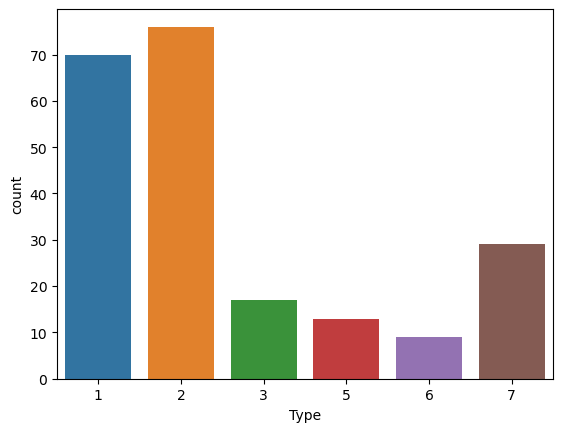

In [18]:
sns.countplot(x = df1['Type'])

The data was not evenly distributed as types 1 and 2 has a much higher count than the rest, it is imbalanced.

Problem 2a:

<AxesSubplot:>

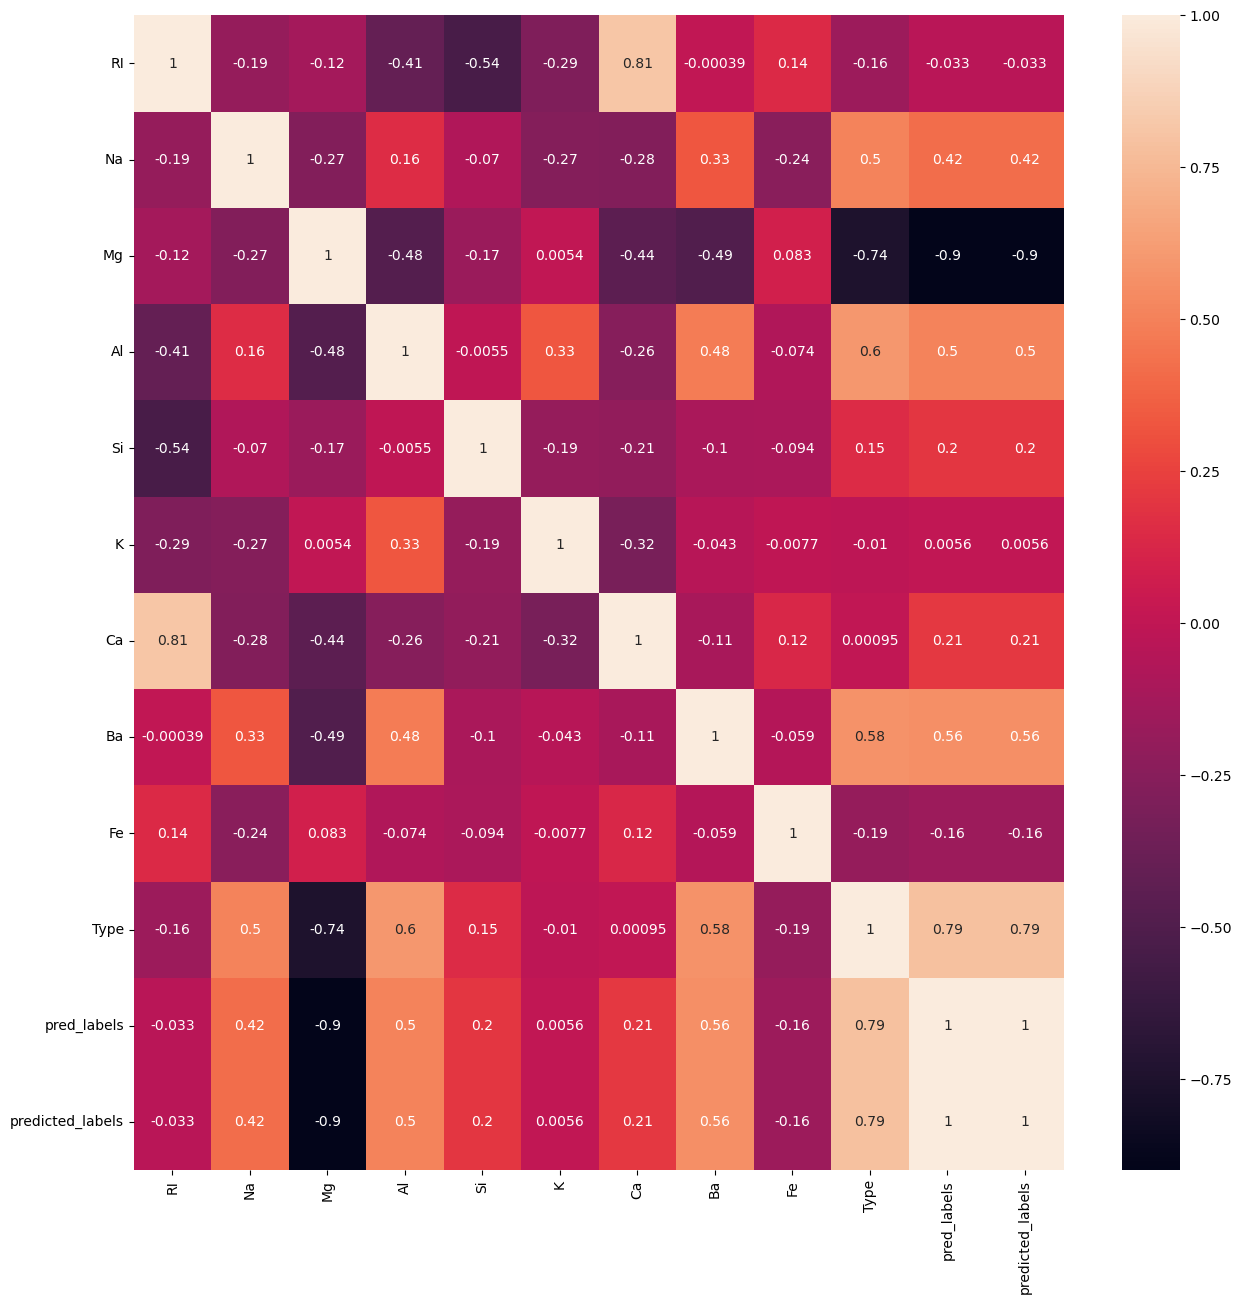

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(), annot = True)

<function matplotlib.pyplot.show(close=None, block=None)>

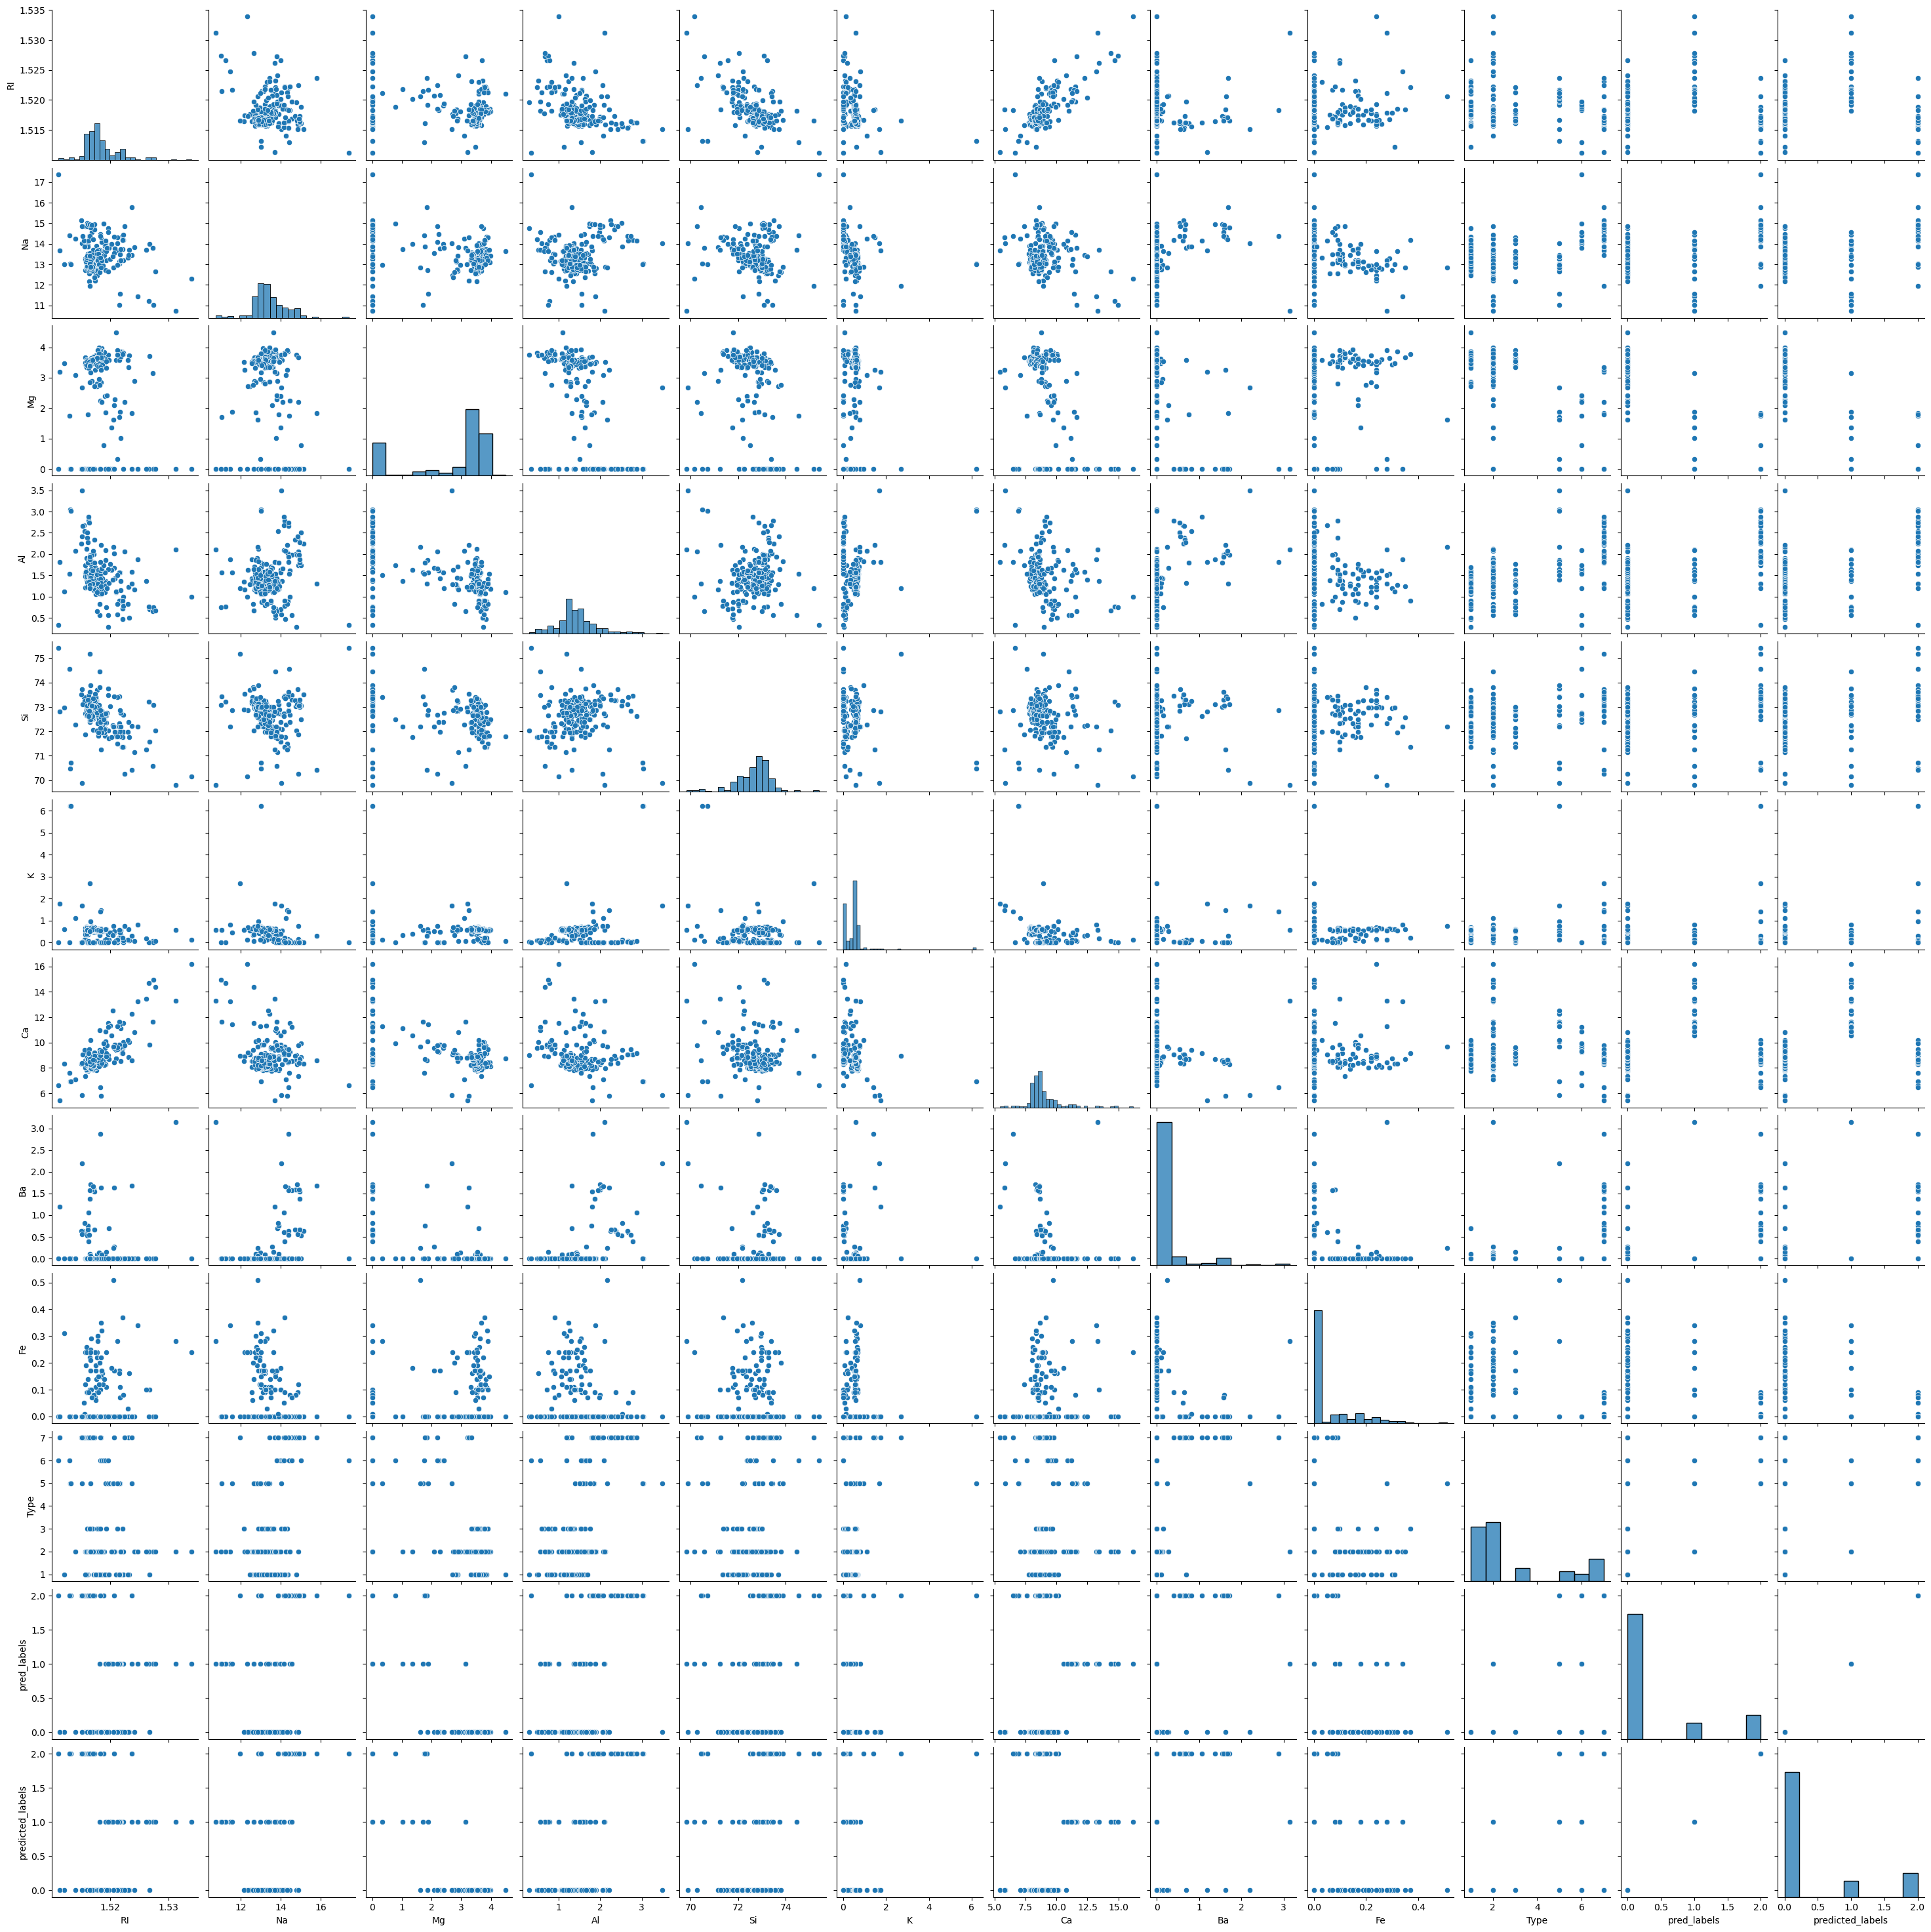

In [22]:
sns.pairplot(df1)
plt.show

<AxesSubplot:>

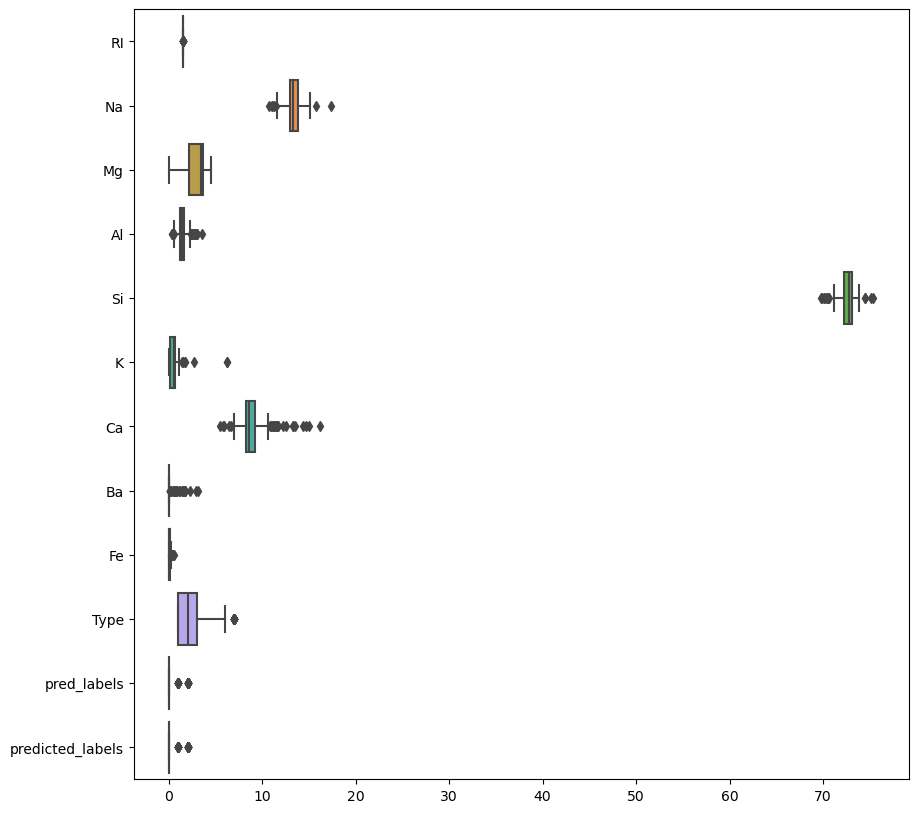

In [24]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df1,orient = 'h')

For the heat map there is a 0.80 correlation between the different types and preeicted labels. 
For the pairplot there are a significant amount of features with lots of zeros.
Fot the boxplot Na, Ca, and Si are similar in scale.

Problem 2b:

In [25]:
df3 = df1.drop(["RI"], axis = 1)

Its best to drop this feature as it does not predict the types of glass.

# Part 2:

Problem 1

In [27]:
x = df3.drop(["Type"], axis = 1)
y = df3["Type"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [30]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Problem 2a:

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_params = {
    "kernel" : ["rbf", "poly", "sigmoid"],
    "C" : [0.1, 1, 10, 100, 1000],
    "gamma" : [0.001, 0.01, 0.1, 1, "scale"],
    "degree" : [1, 2, 3]
}
gs = GridSearchCV(SVC(),grid_params,cv=3)
gs_results = gs.fit(x_train_scaled, y_train)

Problem 2b:

In [40]:
print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.6712925170068028
{'C': 1000, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, degree=1, gamma=0.01)


In [46]:
from sklearn import metrics
svc = SVC(C = 10, degree = 1, gamma = 'scale', kernel = 'rbf')
svc.fit(x_train_scaled, y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(svc.score(x_train_scaled, y_train))
print(metrics.confusion_matrix(y_test, y_pred_svc))

0.8322147651006712
[[15  6  0  0  0  0]
 [ 2 18  0  0  1  1]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  1  3  2]
 [ 1  0  0  0  0  8]]


In [72]:
from sklearn import metrics
svc = SVC(C = 1000,degree = 1, gamma = 1, kernel = 'poly')
svc.fit(x_train_scaled, y_train)
print(svc.score(x_train_scaled, y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.7785234899328859
0.6923076923076923


The score is 83% and the accuracy is 77%.

Problem 3a:

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
grid_params = {
    "n_estimators" : [100, 150, 200, 250, 300, 350, 400],
    "max_features" : ["sqrt", "log2"],
    "max_depth" : [4, 6, 8, 12],
}
gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)
gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7318367346938776
RandomForestClassifier(max_depth=8, max_features='sqrt')
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


Problem 3b:

In [44]:
rf = RandomForestClassifier(max_depth = 6, max_features = 'log2', n_estimators = 200)
rf.fit(x_train_scaled, y_train)
print(rf.score(x_train_scaled, y_train))

0.9261744966442953


In [45]:
from sklearn import metrics

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)
results = metrics.classification_report(y_test, y_pred_rf)
print(results)

0.7384615384615385
[[18  3  0  0  0  0]
 [ 2 18  0  1  0  1]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  2  3  0]
 [ 1  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.72      0.86      0.78        21
           2       0.75      0.82      0.78        22
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       1.00      0.50      0.67         6
           7       0.89      0.89      0.89         9

    accuracy                           0.74        65
   macro avg       0.60      0.59      0.58        65
weighted avg       0.71      0.74      0.71        65



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model score is 92.6% and the accuracy is 73.8%.

Problem 4a:

In [52]:
from sklearn.neural_network import MLPClassifier
grid_params = {
    "activation" : ["logistic", "relu"],
    "hidden_layer_sizes" : [(10,) ,(20,) ,(20,20), (30,), (20,20,20)],
    "alpha" : [0.0001, 0.005, 0.01],
    "max_iter" : [5000]
}
gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)
gs_results = gs.fit(x_train_scaled, y_train)

In [53]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7117006802721088
MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=5000)
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'max_iter': 5000}


Problem 4b:

In [ ]:
mlp = MLPClassifier(activation = 'logistic', alpha = 0.005, hidden_layer_sizes = (10,),
              max_iter = 5000)
mlp.fit(x_train_scaled, y_train)
print(mlp.score(x_train_scaled, y_train))

In [68]:
mlp = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (30,), max_iter = 5000)
mlp.fit(x_train_scaled, y_train)
y_pred_mlp = mlp.predict(x_test_scaled)

print(mlp.score(x_train_scaled, y_train))
print(metrics.accuracy_score(y_test, y_pred_mlp))
print(metrics.confusion_matrix(y_test, y_pred_mlp))

0.9060402684563759
0.6615384615384615
[[15  5  1  0  0  0]
 [ 4 15  0  1  1  1]
 [ 3  1  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  1  3  1]
 [ 1  0  0  0  0  8]]


The model score is 90% and the accuracy is 66%.

# Part 3:

Problem 1:

In [61]:
x2 = df3.drop(["Type"], axis = 1)
y2 = df3["Type"]

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_bal, y_bal = sm.fit_resample(x,y)

Problem 2:

<AxesSubplot:xlabel='Type', ylabel='count'>

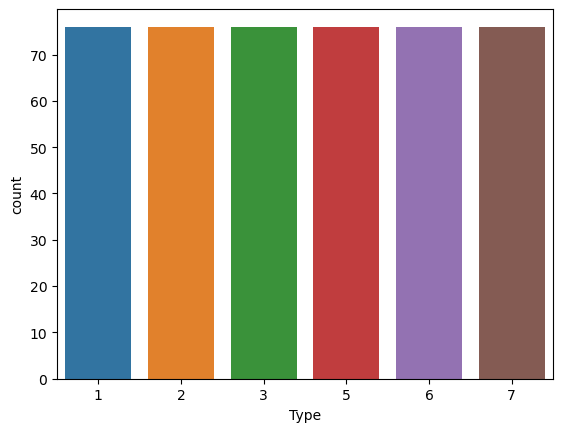

In [62]:
sns.countplot(x = y_bal)

In [56]:
x_trainbal, x_testbal, y_trainbal, y_testbal = train_test_split(x_bal, y_bal, test_size = 0.3)

In [57]:
scaler = StandardScaler()
x_train_scaled_bal = scaler.fit_transform(x_trainbal)
x_test_scaled_bal = scaler.transform(x_testbal)

In [58]:
svc2 = SVC(C = 10, degree = 1, gamma = 'scale', kernel = 'rbf')
svc2.fit(x_train_scaled_bal, y_trainbal)
y_pred_svc2 = svc2.predict(x_test_scaled_bal)

print(svc2.score(x_train_scaled_bal, y_trainbal))
print(metrics.accuracy_score(y_testbal, y_pred_svc2))
print(metrics.confusion_matrix(y_testbal, y_pred_svc2))

0.8683385579937304
0.7883211678832117
[[13  1 11  0  0  0]
 [ 8 17  5  0  0  0]
 [ 3  1 19  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 22]]


In [59]:
rf2 = RandomForestClassifier(max_depth = 10, max_features = 'sqrt', n_estimators = 400, n_jobs = 6)
rf2.fit(x_train_scaled_bal, y_trainbal)
y_pred_rf2 = rf2.predict(x_test_scaled_bal)

print(rf2.score(x_train_scaled_bal, y_trainbal))
print(metrics.accuracy_score(y_testbal, y_pred_rf2))
print(metrics.confusion_matrix(y_testbal, y_pred_rf2))

1.0
0.8321167883211679
[[16  1  8  0  0  0]
 [ 7 20  1  2  0  0]
 [ 3  0 20  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  1  0 21]]


In [60]:
mlp2 = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (30,), max_iter = 5000)
mlp2.fit(x_train_scaled_bal, y_trainbal)
y_pred_mlp2 = mlp2.predict(x_test_scaled_bal)

print(mlp2.score(x_train_scaled_bal,y_trainbal))
print(metrics.accuracy_score(y_testbal,y_pred_mlp2))
print(metrics.confusion_matrix(y_testbal,y_pred_mlp2))

0.9467084639498433
0.7956204379562044
[[15  2  8  0  0  0]
 [10 16  2  2  0  0]
 [ 3  1 19  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 22]]


Problem 3a:

In [64]:
grid_params = {
    "kernel" : ["rbf", "poly", "sigmoid"],
    "C" : [0.1, 1, 10, 100, 1000],
    "gamma" : [0.001, 0.01, 0.1, 1, "scale"],
    "degree" : [1, 2, 3]
}
gs = GridSearchCV(SVC(),grid_params, cv = 3)
gs_results = gs.fit(x_train_scaled_bal,y_trainbal)
print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8463527890436726
{'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, degree=1, gamma=1)


In [65]:
svc3 = SVC(C = 1000, kernel = 'poly')
svc3.fit(x_train_scaled_bal, y_trainbal)
y_pred_svc3 = svc3.predict(x_test_scaled_bal)

print(svc3.score(x_train_scaled_bal, y_trainbal))
print(metrics.accuracy_score(y_testbal, y_pred_svc3))
print(metrics.confusion_matrix(y_testbal, y_pred_svc3))

0.9529780564263323
0.7737226277372263
[[18  0  7  0  0  0]
 [ 8 14  4  2  1  1]
 [ 4  0 19  0  0  0]
 [ 0  3  0 14  1  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 22]]


The model score is 95% and the accuracy is 77%.

Problem 3b:

In [66]:
grid_params = {
    "n_estimators" : [100, 150, 200, 250, 300, 350, 400],
    "max_features" : ['sqrt', 'log2'],
    "max_depth" : [4, 6, 8, 10, 12],
    "n_jobs"  : [6]
}
gs = GridSearchCV(RandomForestClassifier(), grid_params, cv = 3)
gs_results = gs.fit(x_train_scaled_bal, y_trainbal)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8681890319167694
RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=300,
                       n_jobs=6)
{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 300, 'n_jobs': 6}


In [67]:
rf3 = RandomForestClassifier(max_depth = 8, max_features = 'sqrt', n_estimators = 150, n_jobs = 6)
rf3.fit(x_train_scaled_bal, y_trainbal)
y_pred_rf3 = rf3.predict(x_test_scaled_bal)

print(rf3.score(x_train_scaled_bal, y_trainbal))
print(metrics.accuracy_score(y_testbal, y_pred_rf3))
print(metrics.confusion_matrix(y_testbal, y_pred_rf3))

0.9843260188087775
0.8175182481751825
[[14  1 10  0  0  0]
 [ 6 20  2  2  0  0]
 [ 3  0 20  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  1  0 21]]


The optimal parameters did change. The model score is 98% and the accuracy is 81%.

Problem 3c:

In [70]:
grid_params = {
    "activation" : ['relu', 'logistic'],
    "hidden_layer_sizes" : [(10,), (20,), (20,20), (30,), (20, 20, 20)],
    "alpha" : [0.0001, .005, .01],
    "max_iter" : [5000]
}
gs = GridSearchCV(MLPClassifier(), grid_params, cv = 3)
gs_results = gs.fit(x_train_scaled_bal, y_trainbal)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8119379298183742
MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=5000)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'max_iter': 5000}


In [71]:
mlp3 = MLPClassifier(alpha = 0.005, hidden_layer_sizes = (30,), max_iter = 5000)
mlp3.fit(x_train_scaled_bal, y_trainbal)
y_pred_mlp3 = mlp3.predict(x_test_scaled_bal)

print(mlp3.score(x_train_scaled_bal,y_trainbal))
print(metrics.accuracy_score(y_testbal,y_pred_mlp3))
print(metrics.confusion_matrix(y_testbal,y_pred_mlp3))

0.9529780564263323
0.8321167883211679
[[18  1  6  0  0  0]
 [ 6 18  2  3  0  1]
 [ 3  1 19  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 22]]


The optimal parameters did change. The model score is 95% and the accuracy is 83%.

Problem 3d:

The best scoring model utilized SMOTE. It allowed for many correct predictions throughout the data leading to in increase in model accuracy. The models performed better overall with SMOTE.